In [ ]:
# The following analysis was proposed in discussions with Khurana group: 
# https://mail.google.com/mail/u/0/#inbox/QgrcJHrnvrtLdKxwGgQthdBxLwhhXMNvctg

In [ ]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

In [3]:
import pickle 

with open('khurana-random-forest', 'rb') as f:
  KHURANA_MODEL = pickle.load(f)

KHURANA_MODEL

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [4]:
import pandas as pd

def unpack(region): 
  chrom, start, end = region.split('-')
  return chrom, int(start), int(end)

def pack(chrom, start, end): 
  return '{}:{}-{}'.format(chrom, start, end)

def make_unit_offset(region): 
  chrom, start, end = unpack(region)
  return pack(chrom, start+1, end)

def read_train_network_features(): 
  X = pd.read_csv('X.csv') 
  X = X.rename(columns={'Unnamed: 0':'enhancer_hg19'})
  X['enhancer_hg19'] = X['enhancer_hg19'].apply(make_unit_offset) 
  return X 

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 10)

DATA = read_train_network_features() 
DATA

,enhancer_hg19,outDegree,indegreeAveGene,indegreeVarGene,indispenAveGene,indispenVarGene,numTissueAve,numTissueVar,closeAveGene,closeVarGene,degreeAveGene,degreeVarGene,pgrkAveGene,pgrkVarGene,egAveGene,egVarGene,SG1_outDegree,SG1_indegreeAveGene,SG1_indegreeVarGene,SG8_outDegree,SG8_indegreeAveGene,SG8_indegreeVarGene,SG19_outDegree,SG19_indegreeAveGene,SG19_indegreeVarGene,SG29_outDegree,SG29_indegreeAveGene,SG29_indegreeVarGene,SG32_outDegree,SG32_indegreeAveGene,SG32_indegreeVarGene,SG36_outDegree,SG36_indegreeAveGene,SG36_indegreeVarGene,SG37_outDegree,SG37_indegreeAveGene,SG37_indegreeVarGene,SG38_outDegree,SG38_indegreeAveGene,SG38_indegreeVarGene,SG47_outDegree,SG47_indegreeAveGene,SG47_indegreeVarGene,SG50_outDegree,SG50_indegreeAveGene,SG50_indegreeVarGene,SG53_outDegree,SG53_indegreeAveGene,SG53_indegreeVarGene,SG57_outDegree,SG57_indegreeAveGene,SG57_indegreeVarGene,SG65_outDegree,SG65_indegreeAveGene,SG65_indegreeVarGene,SG68_outDegree,SG68_indegreeAveGene,SG68_indegreeVarGene,SG72_outDegree,SG72_indegreeAveGene,SG72_indegreeVarGene,conservation,numTissue
0,chr1:169910801-169912800,4,44.25,66.687500,0.836269,0.012138,2.5,2.25,0.059085,0.002408,0.000274,2.034976e-08,0.000062,2.221460e-09,4.289886e-05,2.812663e-09,3.0,11.666667,4.222222,3.0,24.333333,16.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450548,5
1,chr9:159601-160400,4,29.25,23.187500,0.311868,0.142680,1.0,0.00,0.001750,0.000008,0.000113,3.483605e-10,0.000016,4.350884e-12,1.428127e-21,6.118637e-42,0.0,0.000000,0.000000,4.0,15.750000,2.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.659891,0
2,chr4:155533801-155535600,5,40.40,15.440000,0.392993,0.061609,2.6,0.64,0.024381,0.000448,0.000180,1.387754e-10,0.000024,2.978524e-11,2.401443e-10,2.306720e-19,4.0,23.000000,29.500000,4.0,26.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,5.0,8.6,1.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057413,2
3,chr11:8317201-8319000,1,45.00,0.000000,0.704954,0.000000,6.0,0.00,0.037784,0.000000,0.000192,0.000000e+00,0.000044,0.000000e+00,1.121171e-13,0.000000e+00,1.0,19.000000,0.000000,1.0,36.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335124,5
4,chr3:157903001-157904600,1,22.00,0.000000,0.941562,0.000000,1.0,0.00,0.077233,0.000000,0.000109,0.000000e+00,0.000023,0.000000e+00,1.510755e-07,0.000000e+00,0.0,0.000000,0.000000,1.0,12.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.674299,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,chrX:146844001-146845800,1,28.00,0.000000,0.969877,0.000000,3.0,0.00,0.011010,0.000000,0.000166,0.000000e+00,0.000032,0.000000e+00,2.338143e-19,0.000000e+00,0.0,0.000000,0.000000,1.0,21.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.066745,2
95,chr6:167488201-167488400,6,33.00,9.333333,0.474614,0.137035,1.0,0.00,0.006170,0.000165,0.000148,2.741463e-09,0.000015,2.846719e-11,1.062970e-14,5.649523e-28,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.666667,5.888889,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
def read_train_labels():
  y = pd.read_csv('y.csv')
  y = y.rename(columns={
    'Unnamed: 0':'enhancer_hg19',
  })
  y['enhancer_hg19'] = y['enhancer_hg19'].apply(make_unit_offset) 
  return y

read_train_labels()

,enhancer_hg19,delState
0,chr1:169910801-169912800,NotDeleted
1,chr9:159601-160400,NotDeleted
2,chr4:155533801-155535600,NotDeleted
3,chr11:8317201-8319000,NotDeleted
4,chr3:157903001-157904600,NotDeleted
...,...,...
94,chrX:146844001-146845800,Deleted
95,chr6:167488201-167488400,Deleted
96,chr20:37670601-37672200,Deleted
97,chr13:84480201-84481000,Deleted


In [6]:
DATA = DATA.merge(read_train_labels(), on='enhancer_hg19', how='inner')
DATA

,enhancer_hg19,outDegree,indegreeAveGene,indegreeVarGene,indispenAveGene,indispenVarGene,numTissueAve,numTissueVar,closeAveGene,closeVarGene,degreeAveGene,degreeVarGene,pgrkAveGene,pgrkVarGene,egAveGene,egVarGene,SG1_outDegree,SG1_indegreeAveGene,SG1_indegreeVarGene,SG8_outDegree,SG8_indegreeAveGene,SG8_indegreeVarGene,SG19_outDegree,SG19_indegreeAveGene,SG19_indegreeVarGene,SG29_outDegree,SG29_indegreeAveGene,SG29_indegreeVarGene,SG32_outDegree,SG32_indegreeAveGene,SG32_indegreeVarGene,SG36_outDegree,SG36_indegreeAveGene,SG36_indegreeVarGene,SG37_outDegree,SG37_indegreeAveGene,SG37_indegreeVarGene,SG38_outDegree,SG38_indegreeAveGene,SG38_indegreeVarGene,SG47_outDegree,SG47_indegreeAveGene,SG47_indegreeVarGene,SG50_outDegree,SG50_indegreeAveGene,SG50_indegreeVarGene,SG53_outDegree,SG53_indegreeAveGene,SG53_indegreeVarGene,SG57_outDegree,SG57_indegreeAveGene,SG57_indegreeVarGene,SG65_outDegree,SG65_indegreeAveGene,SG65_indegreeVarGene,SG68_outDegree,SG68_indegreeAveGene,SG68_indegreeVarGene,SG72_outDegree,SG72_indegreeAveGene,SG72_indegreeVarGene,conservation,numTissue,delState
0,chr1:169910801-169912800,4,44.25,66.687500,0.836269,0.012138,2.5,2.25,0.059085,0.002408,0.000274,2.034976e-08,0.000062,2.221460e-09,4.289886e-05,2.812663e-09,3.0,11.666667,4.222222,3.0,24.333333,16.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450548,5,NotDeleted
1,chr9:159601-160400,4,29.25,23.187500,0.311868,0.142680,1.0,0.00,0.001750,0.000008,0.000113,3.483605e-10,0.000016,4.350884e-12,1.428127e-21,6.118637e-42,0.0,0.000000,0.000000,4.0,15.750000,2.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.659891,0,NotDeleted
2,chr4:155533801-155535600,5,40.40,15.440000,0.392993,0.061609,2.6,0.64,0.024381,0.000448,0.000180,1.387754e-10,0.000024,2.978524e-11,2.401443e-10,2.306720e-19,4.0,23.000000,29.500000,4.0,26.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,5.0,8.6,1.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057413,2,NotDeleted
3,chr11:8317201-8319000,1,45.00,0.000000,0.704954,0.000000,6.0,0.00,0.037784,0.000000,0.000192,0.000000e+00,0.000044,0.000000e+00,1.121171e-13,0.000000e+00,1.0,19.000000,0.000000,1.0,36.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335124,5,NotDeleted
4,chr3:157903001-157904600,1,22.00,0.000000,0.941562,0.000000,1.0,0.00,0.077233,0.000000,0.000109,0.000000e+00,0.000023,0.000000e+00,1.510755e-07,0.000000e+00,0.0,0.000000,0.000000,1.0,12.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.674299,0,NotDeleted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,chrX:146844001-146845800,1,28.00,0.000000,0.969877,0.000000,3.0,0.00,0.011010,0.000000,0.000166,0.000000e+00,0.000032,0.000000e+00,2.338143e-19,0.000000e+00,0.0,0.000000,0.000000,1.0,21.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.066745,2,Deleted
95,chr6:167488201-167488400,6,33.00,9.333333,0.474614,0.137035,1.0,0.00,0.006170,0.000165,0.000148,2.741463e-09,0.000015,2.846719e-11,1.062970e-14,5.649523e-28,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.666667,5.888889,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0

In [7]:
DATA['delState'].value_counts()

Deleted       50
NotDeleted    49
Name: delState, dtype: int64

In [8]:
def read_training_positives_intersect_chen_windows():
  # {CONSTRAINT_TOOLS}/download-process-data/khurana/README.md
  df = pd.read_csv(
      "{}/khurana/low-lof-tolerance-enhancers-intersect-chen-windows.bed".format(CONSTRAINT_TOOLS_DATA), 
      sep = '\t',
      names = [
          'chrom_enhancer_hg38', 'start_enhancer_hg38', 'end_enhancer_hg38', 
          'enhancer_hg19', 'unknown',
          'chrom_window_hg38', 'start_window_hg38', 'end_window_hg38', 
          'new_chen_score_window'
      ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window_hg38', 'start_window_hg38', 'end_window_hg38',
    'unknown'
  ])
  df['truly constrained'] = True
  df['tag'] = 'low_lof_tolerance'
  return df 

# get enhancers that are homozygously deleted in 1000 Genomes Project
def read_training_negatives_intersect_chen_windows():
  # {CONSTRAINT_TOOLS}/download-process-data/khurana/README.md
  df = pd.read_csv(
      "{}/khurana/lof-tolerant-enhancers-intersect-chen-windows.bed".format(CONSTRAINT_TOOLS_DATA), 
      sep = '\t',
      names = [
          'chrom_enhancer_hg38', 'start_enhancer_hg38', 'end_enhancer_hg38', 
          'enhancer_hg19', 'unknown',
          'chrom_window_hg38', 'start_window_hg38', 'end_window_hg38', 
          'new_chen_score_window'
      ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window_hg38', 'start_window_hg38', 'end_window_hg38',
    'unknown'
  ])
  df['truly constrained'] = False
  df['tag'] = 'lof_tolerant'
  return df 

def aggregate_over_windows(df): 
  group_columns = set(df.columns) - set(['negative_new_chen_score_window']) 
  group_columns = list(group_columns)
  groups = df.groupby(group_columns)
  aggregation_functions = {'negative_new_chen_score_window': ['min', 'count']}
  aggregated = groups.agg(aggregation_functions)
  
  df = aggregated.reset_index()
  df.columns = [' '.join(col[::-1]).strip() for col in df.columns.values]
  return df


In [9]:
aggregate_over_windows(read_training_positives_intersect_chen_windows())

,tag,truly constrained,enhancer_hg19,end_enhancer_hg38,chrom_enhancer_hg38,start_enhancer_hg38,min negative_new_chen_score_window,count negative_new_chen_score_window
0,low_lof_tolerance,True,chr10:102372401-102374800,100615043,chr10,100612643,-1.667674,4
1,low_lof_tolerance,True,chr10:102446601-102449000,100689243,chr10,100686843,-1.212765,4
2,low_lof_tolerance,True,chr10:102546401-102548800,100789043,chr10,100786643,-2.482828,4
3,low_lof_tolerance,True,chr10:103082001-103083800,101324043,chr10,101322243,-2.900722,2
4,low_lof_tolerance,True,chr10:103265601-103267800,101508043,chr10,101505843,-0.350437,2
...,...,...,...,...,...,...,...,...
40,low_lof_tolerance,True,chr7:31401601-31403800,31364186,chr7,31361986,-1.247859,4
41,low_lof_tolerance,True,chr7:54636201-54637200,54569507,chr7,54568507,-1.270480,2
42,low_lof_tolerance,True,chr7:96641201-96642800,97013488,chr7,97011888,-0.365397,2
43,low_lof_tolerance,True,chr8:99428201-99429400,98417172,chr8,98415972,0.620860,1


In [10]:
aggregate_over_windows(read_training_negatives_intersect_chen_windows())

,tag,truly constrained,enhancer_hg19,end_enhancer_hg38,chrom_enhancer_hg38,start_enhancer_hg38,min negative_new_chen_score_window,count negative_new_chen_score_window
0,lof_tolerant,False,chr10:102359801-102360600,100600843,chr10,100600043,-2.109211,1
1,lof_tolerant,False,chr10:31246801-31247200,30958271,chr10,30957871,-0.659540,1
2,lof_tolerant,False,chr10:70615601-70617800,68858044,chr10,68855844,-1.660269,4
3,lof_tolerant,False,chr10:70618001-70619200,68859444,chr10,68858244,-0.706037,2
4,lof_tolerant,False,chr10:70623401-70623600,68863844,chr10,68863644,0.208005,1
...,...,...,...,...,...,...,...,...
505,lof_tolerant,False,chr9:5391201-5392600,5392600,chr9,5391200,0.083827,2
506,lof_tolerant,False,chr9:5393201-5395000,5395000,chr9,5393200,1.632376,2
507,lof_tolerant,False,chr9:5395201-5396400,5396400,chr9,5395200,0.580882,1
508,lof_tolerant,False,chr9:5399201-5399600,5399600,chr9,5399200,1.117336,1


In [11]:
def read_training_examples_intersect_chen_windows(): 
  df = pd.concat([    
    aggregate_over_windows(read_training_positives_intersect_chen_windows()),
    aggregate_over_windows(read_training_negatives_intersect_chen_windows()),
  ])

  df = df.reset_index(drop=True) # create new index and drop old index
  return df

# NOTE: the number of training examples is reduced because some of the original training examples do not overlap Chen windows: 
DATA = DATA.merge(read_training_examples_intersect_chen_windows(), on='enhancer_hg19', how='inner')
DATA

,enhancer_hg19,outDegree,indegreeAveGene,indegreeVarGene,indispenAveGene,indispenVarGene,numTissueAve,numTissueVar,closeAveGene,closeVarGene,degreeAveGene,degreeVarGene,pgrkAveGene,pgrkVarGene,egAveGene,egVarGene,SG1_outDegree,SG1_indegreeAveGene,SG1_indegreeVarGene,SG8_outDegree,SG8_indegreeAveGene,SG8_indegreeVarGene,SG19_outDegree,SG19_indegreeAveGene,SG19_indegreeVarGene,SG29_outDegree,SG29_indegreeAveGene,SG29_indegreeVarGene,SG32_outDegree,SG32_indegreeAveGene,SG32_indegreeVarGene,SG36_outDegree,SG36_indegreeAveGene,SG36_indegreeVarGene,SG37_outDegree,SG37_indegreeAveGene,SG37_indegreeVarGene,SG38_outDegree,SG38_indegreeAveGene,SG38_indegreeVarGene,SG47_outDegree,SG47_indegreeAveGene,SG47_indegreeVarGene,SG50_outDegree,SG50_indegreeAveGene,SG50_indegreeVarGene,SG53_outDegree,SG53_indegreeAveGene,SG53_indegreeVarGene,SG57_outDegree,SG57_indegreeAveGene,SG57_indegreeVarGene,SG65_outDegree,SG65_indegreeAveGene,SG65_indegreeVarGene,SG68_outDegree,SG68_indegreeAveGene,SG68_indegreeVarGene,SG72_outDegree,SG72_indegreeAveGene,SG72_indegreeVarGene,conservation,numTissue,delState,tag,truly constrained,end_enhancer_hg38,chrom_enhancer_hg38,start_enhancer_hg38,min negative_new_chen_score_window,count negative_new_chen_score_window
0,chr1:169910801-169912800,4,44.25,66.687500,0.836269,0.012138,2.5,2.25,0.059085,0.002408,0.000274,2.034976e-08,0.000062,2.221460e-09,4.289886e-05,2.812663e-09,3.0,11.666667,4.222222,3.0,24.333333,16.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.450548,5,NotDeleted,low_lof_tolerance,True,169943659,chr1,169941659,-0.732262,2
1,chr4:155533801-155535600,5,40.40,15.440000,0.392993,0.061609,2.6,0.64,0.024381,0.000448,0.000180,1.387754e-10,0.000024,2.978524e-11,2.401443e-10,2.306720e-19,4.0,23.000000,29.500000,4.0,26.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,5.0,8.6,1.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.057413,2,NotDeleted,low_lof_tolerance,True,154614448,chr4,154612648,-1.455670,3
2,chr11:8317201-8319000,1,45.00,0.000000,0.704954,0.000000,6.0,0.00,0.037784,0.000000,0.000192,0.000000e+00,0.000044,0.000000e+00,1.121171e-13,0.000000e+00,1.0,19.000000,0.000000,1.0,36.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.335124,5,NotDeleted,low_lof_tolerance,True,8297453,chr11,8295653,-1.699929,2
3,chr3:157903001-157904600,1,22.00,0.000000,0.941562,0.000000,1.0,0.00,0.077233,0.000000,0.000109,0.000000e+00,0.000023,0.000000e+00,1.510755e-07,0.000000e+00,0.0,0.000000,0.000000,1.0,12.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.674299,0,NotDeleted,low_lof_tolerance,True,158186811,chr3,158185211,-0.823611,2
4,chr16:10320001-10321200,1,61.00,0.000000,0.838097,0.000000,5.0,0.00,0.044118,0.000000,0.000283,0.000000e+00,0.000084,0.000000e+00,1.643825e-13,0.000000e+00,0.0,0.000000,0.000000,1.0,37.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,21.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.374137,4,NotDeleted,low_lof_tolerance,True,10227343,chr16,10226143,-0.874568,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,chr12:15570601-15572400,2,30.50,12.250000,0.517101,0.019510,1.0,0.00,0.078505,0.000765,0.000123,8.886747e-11,0.000039,2.143058e-11,1.205856e-05,1.453888e-10,0.0,0.000000,0.000000,2.0,22.500000,

In [12]:
DATA['delState'].value_counts()

NotDeleted    45
Deleted       26
Name: delState, dtype: int64

In [13]:
def get_network_features(): 
  with open('network-features.txt', 'r') as f: 
    features = f.read().split('\n')
    features = [f for f in features if f]
    return features

NETWORK_FEATURES = get_network_features()

DATA['enhancer_predicted_constraint_prob_khurana'] = KHURANA_MODEL.predict_proba(DATA[NETWORK_FEATURES])[:,1]
DATA

,enhancer_hg19,outDegree,indegreeAveGene,indegreeVarGene,indispenAveGene,indispenVarGene,numTissueAve,numTissueVar,closeAveGene,closeVarGene,degreeAveGene,degreeVarGene,pgrkAveGene,pgrkVarGene,egAveGene,egVarGene,SG1_outDegree,SG1_indegreeAveGene,SG1_indegreeVarGene,SG8_outDegree,SG8_indegreeAveGene,SG8_indegreeVarGene,SG19_outDegree,SG19_indegreeAveGene,SG19_indegreeVarGene,SG29_outDegree,SG29_indegreeAveGene,SG29_indegreeVarGene,SG32_outDegree,SG32_indegreeAveGene,SG32_indegreeVarGene,SG36_outDegree,SG36_indegreeAveGene,SG36_indegreeVarGene,SG37_outDegree,SG37_indegreeAveGene,SG37_indegreeVarGene,SG38_outDegree,SG38_indegreeAveGene,SG38_indegreeVarGene,SG47_outDegree,SG47_indegreeAveGene,SG47_indegreeVarGene,SG50_outDegree,SG50_indegreeAveGene,SG50_indegreeVarGene,SG53_outDegree,SG53_indegreeAveGene,SG53_indegreeVarGene,SG57_outDegree,SG57_indegreeAveGene,SG57_indegreeVarGene,SG65_outDegree,SG65_indegreeAveGene,SG65_indegreeVarGene,SG68_outDegree,SG68_indegreeAveGene,SG68_indegreeVarGene,SG72_outDegree,SG72_indegreeAveGene,SG72_indegreeVarGene,conservation,numTissue,delState,tag,truly constrained,end_enhancer_hg38,chrom_enhancer_hg38,start_enhancer_hg38,min negative_new_chen_score_window,count negative_new_chen_score_window,enhancer_predicted_constraint_prob_khurana
0,chr1:169910801-169912800,4,44.25,66.687500,0.836269,0.012138,2.5,2.25,0.059085,0.002408,0.000274,2.034976e-08,0.000062,2.221460e-09,4.289886e-05,2.812663e-09,3.0,11.666667,4.222222,3.0,24.333333,16.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.450548,5,NotDeleted,low_lof_tolerance,True,169943659,chr1,169941659,-0.732262,2,0.955107
1,chr4:155533801-155535600,5,40.40,15.440000,0.392993,0.061609,2.6,0.64,0.024381,0.000448,0.000180,1.387754e-10,0.000024,2.978524e-11,2.401443e-10,2.306720e-19,4.0,23.000000,29.500000,4.0,26.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,5.0,8.6,1.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.057413,2,NotDeleted,low_lof_tolerance,True,154614448,chr4,154612648,-1.455670,3,0.766304
2,chr11:8317201-8319000,1,45.00,0.000000,0.704954,0.000000,6.0,0.00,0.037784,0.000000,0.000192,0.000000e+00,0.000044,0.000000e+00,1.121171e-13,0.000000e+00,1.0,19.000000,0.000000,1.0,36.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.335124,5,NotDeleted,low_lof_tolerance,True,8297453,chr11,8295653,-1.699929,2,0.968524
3,chr3:157903001-157904600,1,22.00,0.000000,0.941562,0.000000,1.0,0.00,0.077233,0.000000,0.000109,0.000000e+00,0.000023,0.000000e+00,1.510755e-07,0.000000e+00,0.0,0.000000,0.000000,1.0,12.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.674299,0,NotDeleted,low_lof_tolerance,True,158186811,chr3,158185211,-0.823611,2,0.821994
4,chr16:10320001-10321200,1,61.00,0.000000,0.838097,0.000000,5.0,0.00,0.044118,0.000000,0.000283,0.000000e+00,0.000084,0.000000e+00,1.643825e-13,0.000000e+00,0.0,0.000000,0.000000,1.0,37.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,21.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.374137,4,NotDeleted,low_lof_tolerance,True,10227343,chr16,10226143,-0.874568,2,0.953313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,chr12:15570601-15572400,2,30.50,12.250000,0.517101,0.019510,1.0,0.00,0.078505,0.000765,0.000123,8.886

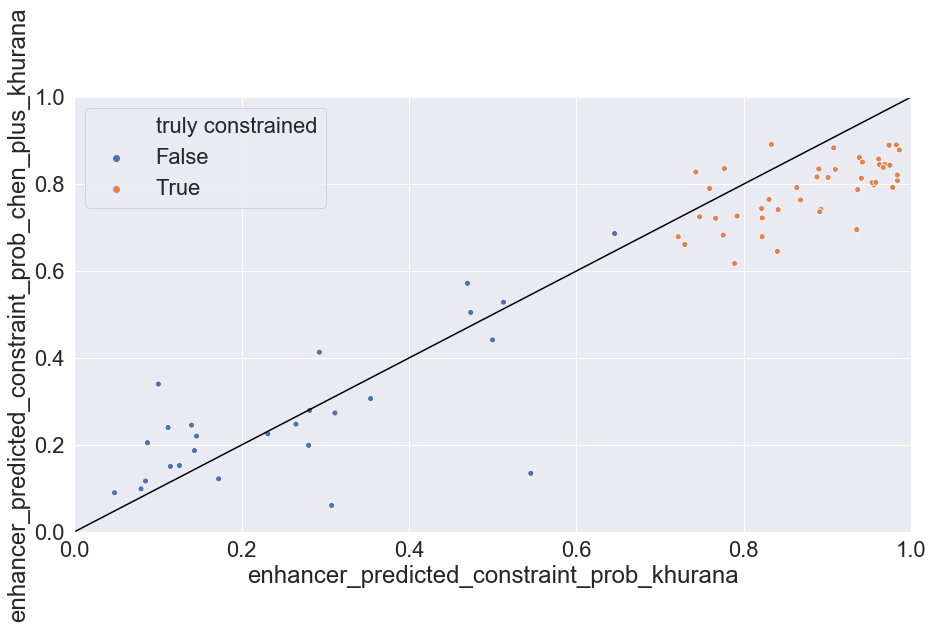

In [17]:
from sklearn.linear_model import LogisticRegression

SCORE_FEATURES =['enhancer_predicted_constraint_prob_khurana', 'min negative_new_chen_score_window']
TARGET = 'truly constrained'

def train_model(): 
  model = LogisticRegression(class_weight='balanced')
  model.fit(DATA[SCORE_FEATURES], DATA[TARGET])
  return model

CHEN_PLUS_KHURANA_MODEL = train_model()
DATA['enhancer_predicted_constraint_prob_chen_plus_khurana'] = CHEN_PLUS_KHURANA_MODEL.predict_proba(DATA[SCORE_FEATURES])[:,1]

import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))

sns.scatterplot(
  x='enhancer_predicted_constraint_prob_khurana', 
  y='enhancer_predicted_constraint_prob_chen_plus_khurana', 
  hue='truly constrained',
  data=DATA
)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'black')
plt.show()


In [26]:
def read_disease_enhancers_intersect_chen_windows():
  # {CONSTRAINT_TOOLS}/download-process-data/khurana/README.md
  df = pd.read_csv(
    "{}/khurana/disease-enhancers-intersect-chen-windows.bed".format(CONSTRAINT_TOOLS_DATA), 
    sep = '\t',
    names = [
        'chrom_enhancer', 'start_enhancer', 'end_enhancer', 
        'disease', 'enhancer_predicted_LoF_tolerance_prob', 'enhancer_predicted_LoF_tolerance_status', 
        'chrom_window', 'start_window', 'end_window', 
        'new_chen_score_window'
    ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.rename(columns={
    'chrom_enhancer': 'chrom', 
    'start_enhancer': 'start', 
    'end_enhancer': 'end'
  })
  df['enhancer_predicted_constraint_prob_khurana'] = 1.0 - df['enhancer_predicted_LoF_tolerance_prob']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window', 'start_window', 'end_window',
    'disease', 'enhancer_predicted_LoF_tolerance_prob', 'enhancer_predicted_LoF_tolerance_status'
  ])
  df['truly constrained'] = True
  df['tag'] = 'disease_enhancers'
  return df 

aggregate_over_windows(read_disease_enhancers_intersect_chen_windows())

,end,tag,start,truly constrained,enhancer_predicted_constraint_prob_khurana,chrom,min negative_new_chen_score_window,count negative_new_chen_score_window
0,2160634,disease_enhancers,2159834,True,0.336234,chr12,-3.402956,2
1,5228370,disease_enhancers,5225970,True,0.506432,chr11,-0.612337,4
2,5236370,disease_enhancers,5236170,True,0.157999,chr11,-0.608309,1
3,6366400,disease_enhancers,6364600,True,0.300163,chr9,-0.233282,3
4,6472369,disease_enhancers,6471569,True,0.543985,chr7,-0.805666,1
...,...,...,...,...,...,...,...,...
68,170834490,disease_enhancers,170832090,True,0.678984,chr2,-2.054150,1
69,173915462,disease_enhancers,173915262,True,0.074476,chr1,-1.790974,1
70,177993199,disease_enhancers,177992999,True,0.165411,chr5,-3.607152,1
71,199920277,disease_enhancers,199919277,True,0.405388,chr2,-1.605622,1


In [16]:
# [MIGHT NOT DO THIS] TODO

# 1. create a new feature vector by simply adding Chen's zscore as a new feature to the training examples
# 2. retrain the classifier 
# 3. but this is no use right now because it can only be run on the training set, not on the test set, as we do not know network features for the test set (but we could request them...)
